Laad de benodigde packages in

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

Laad de data in

In [2]:
# Importing the dataset
dataset = pd.read_excel('Proef7 metingen.xlsx')
print(dataset)

    Druk lek (mbar)     t1      t2      t3      t4      t5  t6      t_a  \
0                30   6.33   5.199   5.232   5.099   5.232 NaN   5.4184   
1                25   7.71   6.030   5.970   5.900     NaN NaN   6.4025   
2                20  10.50   8.170   8.250   7.770   7.840 NaN   8.5060   
3                15  11.91   9.700   9.510   9.480     NaN NaN  10.1500   
4                10  18.71  16.550  16.350  16.470  16.070 NaN  16.8300   
5                 5  29.63  25.860  25.350  25.420  26.180 NaN  26.4880   
6               NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
7               NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
8   * met gasbalast    NaN     NaN     NaN     NaN     NaN NaN      NaN   
9               NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
10              NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
11              NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
12              NaN    Na

In [3]:
dataset = dataset.to_dict()

In [4]:
t1 = np.array(list(dataset['t_actual1'].values()))[~np.isnan(np.array(list(dataset['t_actual1'].values())))]
t2 = np.array(list(dataset['t_actual2'].values()))[~np.isnan(np.array(list(dataset['t_actual2'].values())))]
t3 = np.array(list(dataset['t_actual3'].values()))[~np.isnan(np.array(list(dataset['t_actual3'].values())))]
t4 = np.array(list(dataset['t_actual4'].values()))[~np.isnan(np.array(list(dataset['t_actual4'].values())))]
p1 = 100*np.array(list(dataset['druk1'].values()))[~np.isnan(np.array(list(dataset['druk1'].values())))]
p2 = 100*np.array(list(dataset['druk2'].values()))[~np.isnan(np.array(list(dataset['druk2'].values())))]
p3 = 100*np.array(list(dataset['druk3'].values()))[~np.isnan(np.array(list(dataset['druk3'].values())))]
p4 = 100*np.array(list(dataset['druk4'].values()))[~np.isnan(np.array(list(dataset['druk4'].values())))]

Noteer bepaalde constanten zoals de onnauwkuerigheid van de druk en de tijd, einddruk en het volume van de kamer.

In [65]:
dt = 0.02
dp = 0.05*100 #HPa->Pa
pe = 100*100 #HPa->Pa

r_kamer = 0.15
dr_kamer = 0.02
L_kamer = 0.7
dL_kamer = 0.02

V_kamer = np.pi*r_kamer**2*L_kamer
dV_kamer = np.sqrt((2*np.pi*r_kamer*L_kamer*dr_kamer)**2+(np.pi*r_kamer**2*dL_kamer)**2)

Maak een plotje van de data om te laten zien dat het een exponentiëel verval is

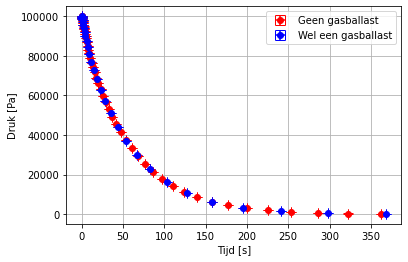

In [6]:
plt.errorbar(t1, p1, dp, dt, 'or', label='Geen gasballast', capsize=5)
plt.errorbar(t2, p2, dp, dt, 'ob', label='Wel een gasballast', capsize=5)
plt.legend()
plt.grid()
plt.xlabel('Tijd [s]')
plt.ylabel('Druk [Pa]')
plt.savefig('Proef7 metingen1.pdf', dpi=300, bbox_inches='tight')

Bereken $p-p_e$ en $\log_{10}(p-p_e)$ voor alle $p$ lijsten. Voor $p_1$ en $p_2$ is dit niet nodig, omdat de einddruk $0$ Pa is.

In [7]:
p3 = p3-pe
p4 = p4-pe

p1 = np.log10(p1)
p2 = np.log10(p2)
p3 = np.log10(p3)
p4 = np.log10(p4)

Bereken de fit voor de data

In [45]:
fits = []
for t, p in zip([t1, t2, t3, t4], [p1, p2, p3, p4]):
    fits.append(linregress(t, p))

In [46]:
print(fits)

[LinregressResult(slope=-0.007886390892494438, intercept=4.996982978801798, rvalue=-0.9989572901726642, pvalue=5.18441975985986e-66, stderr=5.202286318953037e-05, intercept_stderr=0.005794124805820324), LinregressResult(slope=-0.007992993546367608, intercept=4.9997601424490155, rvalue=-0.9984637985359602, pvalue=9.888485706214045e-37, stderr=8.382438070852183e-05, intercept_stderr=0.009579729612372299), LinregressResult(slope=-0.00743947499255981, intercept=4.930566038485461, rvalue=-0.9997242240392179, pvalue=3.5972219152133974e-47, stderr=3.302526521708273e-05, intercept_stderr=0.004114799673274553), LinregressResult(slope=-0.007359341245867707, intercept=4.930068360658595, rvalue=-0.9996717415500435, pvalue=4.121564009285152e-46, stderr=3.564427795929925e-05, intercept_stderr=0.00460663624221716)]


In [60]:
def func(x, a, b):
    return a*x+b

Geen gasballast, geen lek

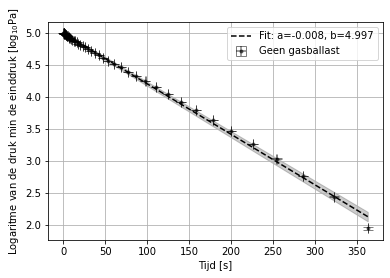

In [61]:
plt.errorbar(t1, p1, dp/(np.log(10)*np.power(10, p1)), dt, 'ok', markersize=3, alpha=0.5, label='Geen gasballast', capsize=5)
plt.plot(t1, func(t1, fits[0][0], fits[0][1]), 'k--', label='Fit: a=%5.3f, b=%5.3f' % (fits[0][0], fits[0][1]))
p1_max = func(t1, fits[0].slope + 3 * fits[0].stderr, fits[0].intercept + 3 * fits[0].intercept_stderr)
p1_min = func(t1, fits[0].slope - 3 * fits[0].stderr, fits[0].intercept - 3 * fits[0].intercept_stderr)
plt.fill_between(t1, p1_min, p1_max, color='k', alpha=0.2)
plt.legend()
plt.xlabel('Tijd [s]')
plt.ylabel(r'Logaritme van de druk min de einddruk [$\log_{10}$Pa]')
plt.grid()
plt.savefig('GeenGeen.pdf', dpi=300, bbox_inches='tight')


Wel gasballast, geen lek

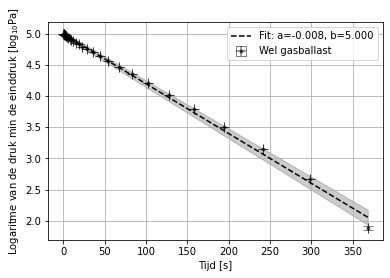

In [62]:
plt.errorbar(t2, p2, dp/(np.log(10)*np.power(10, p2)), dt, 'ok', markersize=3, alpha=0.5, label='Wel gasballast', capsize=5)
plt.plot(t2, func(t2, fits[2-1][0], fits[2-1][1]), 'k--', label='Fit: a=%5.3f, b=%5.3f' % (fits[2-1][0], fits[2-1][1]))
p2_max = func(t2, fits[2-1].slope + 3 * fits[2-1].stderr, fits[2-1].intercept + 3 * fits[2-1].intercept_stderr)
p2_min = func(t2, fits[2-1].slope - 3 * fits[2-1].stderr, fits[2-1].intercept - 3 * fits[2-1].intercept_stderr)
plt.fill_between(t2, p2_min, p2_max, color='k', alpha=0.2)
plt.legend()
plt.xlabel('Tijd [s]')
plt.ylabel(r'Logaritme van de druk min de einddruk [$\log_{10}$Pa]')
plt.grid()
plt.savefig('WelGeen.pdf', dpi=300, bbox_inches='tight')

Geen gasballast, wel lek

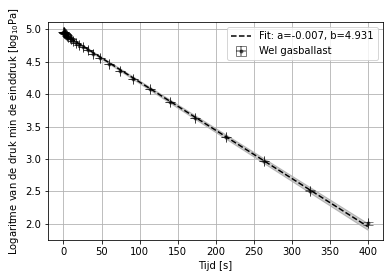

In [63]:
plt.errorbar(t3, p3, dp/(np.log(10)*np.power(10, p3)), dt, 'ok', markersize=3, alpha=0.5, label='Wel gasballast', capsize=5)
plt.plot(t3, func(t3, fits[3-1][0], fits[3-1][1]), 'k--', label='Fit: a=%5.3f, b=%5.3f' % (fits[3-1][0], fits[3-1][1]))
p3_max = func(t3, fits[3-1].slope + 3 * fits[3-1].stderr, fits[3-1].intercept + 3 * fits[3-1].intercept_stderr)
p3_min = func(t3, fits[3-1].slope - 3 * fits[3-1].stderr, fits[3-1].intercept - 3 * fits[3-1].intercept_stderr)
plt.fill_between(t3, p3_min, p3_max, color='k', alpha=0.2)
plt.legend()
plt.xlabel('Tijd [s]')
plt.ylabel(r'Logaritme van de druk min de einddruk [$\log_{10}$Pa]')
plt.grid()
plt.savefig('GeenWel.pdf', dpi=300, bbox_inches='tight')

Wel gasballast, wel lek

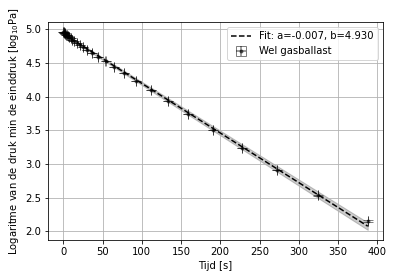

In [64]:
plt.errorbar(t4, p4, dp/(np.log(10)*np.power(10, p4)), dt, 'ok', markersize=3, alpha=0.5, label='Wel gasballast', capsize=5)
plt.plot(t4, func(t4, fits[4-1][0], fits[4-1][1]), 'k--', label='Fit: a=%5.3f, b=%5.3f' % (fits[4-1][0], fits[4-1][1]))
p4_max = func(t4, fits[4-1].slope + 3 * fits[4-1].stderr, fits[4-1].intercept + 3 * fits[4-1].intercept_stderr)
p4_min = func(t4, fits[4-1].slope - 3 * fits[4-1].stderr, fits[4-1].intercept - 3 * fits[4-1].intercept_stderr)
plt.fill_between(t4, p4_min, p4_max, color='k', alpha=0.2)
plt.legend()
plt.xlabel('Tijd [s]')
plt.ylabel(r'Logaritme van de druk min de einddruk [$\log_{10}$Pa]')
plt.grid()
plt.savefig('WelWel.pdf', dpi=300, bbox_inches='tight')

In [68]:
def find_S(slope, slope_err):
    S = -2.3*slope*V_kamer
    S_err = np.sqrt((2.3*V_kamer*slope_err)**2+(2.3*slope*dV_kamer)**2)
    return S, S_err

In [69]:
S1 = find_S(fits[1-1].slope, fits[1-1].stderr)
S2 = find_S(fits[2-1].slope, fits[2-1].stderr)
S3 = find_S(fits[3-1].slope, fits[3-1].stderr)
S4 = find_S(fits[4-1].slope, fits[4-1].stderr)

In [77]:
print(r"{:.1e}±{:.1e}".format(S1[0], S1[1]), r"{:.1e}±{:.1e}".format(S2[0], S2[1]), r"{:.1e}±{:.1e}".format(S3[0], S3[1]), r"{:.1e}±{:.1e}".format(S4[0], S4[1]))

9.0e-04±2.4e-04 9.1e-04±2.4e-04 8.5e-04±2.3e-04 8.4e-04±2.2e-04
